Max-Sum equations
--

\begin{align*}
u_{ai}\left(\sigma_{i}\right)= &\sigma_{i}f_{ai}+g_{ai}\\
u_{ai}\left(\sigma_{i}\right)= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}u_{ja}\left(\sigma_{j}\right)+\sigma_{j}s_{j}+const\\
b_{i}\left(\sigma_{i}\right)= & u_{ai}\left(\sigma_{i}\right)+u_{bi}\left(\sigma_{i}\right)+\sigma_{i}s_{i}+const=b_{i}\sigma_{i}+const\\
b_{i}= & \frac{1}{2}\left[f_{ai}+f_{bi}+s_{i}-\left(-f_{ai}-f_{bi}-s_{i}\right)\right]\\
= & f_{ai}+f_{bi}+s_{i}\\
\sigma_{i}f_{ai}= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}f_{ja}\sigma_{j}+\sigma_{j}s_{j}+const\\
f_{ai}= & \frac{1}{2}\left[\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=1}\left(\sum_{j\in\partial a\setminus i}\left(f_{ja}+s_{j}\right)\sigma_{j}\right)-\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=-1}\left(\sum_{j\in\partial a\setminus i}\left(f_{ja}+s_{j}\right)\sigma_{j}\right)\right]\\
= & \frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0\\
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|-2\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0
\end{cases}-\\
 & -\frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0\\
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|-2\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0
\end{cases}\\
= & \begin{cases}
\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0\\
-\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0
\end{cases}
\end{align*}

So we get
$$f_{ai}= \min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|\prod_{j\in\partial a\setminus i}\text{sign}\left(f_{ja}+s_{j}\right)$$


Distribution in the quenched disorder
---

\begin{align*}
p\left(f\right)= & \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)\\
=& \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}\right)\right)\prod_{j=1}^{k}\sum_{s_j}p\left(f_{j}+s_j\right)\\
\end{align*}

In [3]:
using OffsetArrays


function iter_slow(p,K)
    N = lastindex(p)
    p1 = copy(p)
    p1 .= 0
    S = CartesianIndices(Tuple(fill(0:1,K-1)))
    for F in CartesianIndices(Tuple(fill(-N:N,K-1)))
        ff = Tuple(F)
        P = prod(p[fi] for fi in ff)
        for fs in map(s -> ff .+ (2 .* Tuple(s) .- 1), S)
            f = minimum(abs.(fs))*sign(prod(fs))
            #println("$ff $fs $f $P")
            p1[clamp(f, -N, N)] += P
        end
    end
    p1 / sum(p1)
end

┌ Info: Precompiling OffsetArrays [6fe1bfb0-de20-5000-8ca7-80f57d26f881]
└ @ Base loading.jl:1313
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for OffsetArrays [6fe1bfb0-de20-5000-8ca7-80f57d26f881]
│   exception = ErrorException("Required dependency NetworkOptions [ca575930-c2e3-43a9-ace4-1e988b2c1908] failed to load from a cache file.")
└ @ Base loading.jl:1029
┌ Info: Precompiling Adapt [79e6a3ab-5dfb-504d-930d-738a2a938a0e]
└ @ Base loading.jl:1313
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Adapt [79e6a3ab-5dfb-504d-930d-738a2a938a0e]
│   exception = ErrorException("Required dependency NetworkOptions [ca575930-c2e3-43a9-ace4-1e988b2c1908] failed to load from a cache file.")
└ @ Base loading.jl:1029


iter_slow (generic function with 1 method)

Simplifications
--

$$f = \min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^k\text{sign}\left(f_{j}+s_{j}\right)$$

\begin{align*}
p\left(f\right)= & \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)\\
= & \sum_{f_{1},\dots,f_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}\right)\right)\prod_{j=1}^{k}\frac{1}{2}\sum_{s_{j}}p\left(f_{j}-s_{j}\right)\\
= & \begin{cases}
\frac{1}{2}\sum_{f_{1},\dots,f_{k}>0}\delta\left(f;\min_{j=1,\dots,k}f_{j}\right)\prod_{j=1}^{k}\sum_{s_{j}}p\left(f_{j}-s_{j}\right) & \text{ for }f>0\\
\sum_{n=1}^{k}\binom{k}{n}\left(\frac{1}{2}\sum_{s_{j}}p\left(s_{j}\right)\right)^{k-n}\left(\sum_{f'>0}\sum_{s}p\left(f'-s\right)\right)^{n} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\sum_{n=0}^{k-1}\binom{k}{n}\left(\frac{1}{2}\sum_{s}p\left(s\right)\right)^{k-n}\left(\sum_{f'>0}\sum_{s}p\left(f'+s\right)\right)^{n} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\left(\frac{1}{2}\sum_{s\in\pm1}p\left(s\right)+\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\left(p(1)+\sum_{f'>0}p(f'+1)+p(f'-1)\right)^k - \left(\sum_{f'>0}p(f'+1)+p(f'-1)\right)^k & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
1-(1-p(1))^k & \text{ for }f=0
\end{cases}\\
\end{align*}


In [65]:
function iter(p,K)
    k = K - 1
    p1 = copy(p)
    p1 .= 0.0
    N = lastindex(p1)-1
    for f = 1:N-1
        v1 = p[f+1]+p[f-1]
#        v2 = sum((p[f1+1]+p[f1-1] for f1=f+1:N), init=0.0)
        v2 = sum(p[f1+1]+p[f1-1] for f1=f+1:N)
        v = (v1+v2)^k-v2^k
        p1[+f] += v/2
        p1[-f] += v/2
    end
    v1 = (p[1]+p[-1])/2
    v2 = sum(p[f1+1]+p[f1-1] for f1=1:N)
    p1[0] = (v1+v2)^k-v2^k
    p1 ./ sum(p1)
end

iter (generic function with 1 method)

In [53]:
function iternofields(p,K)
    k = K - 1
    p1 = zero(p)
    N = lastindex(p1)-1
    for f = 0:N-1
        #v1 = p[f+1]+p[f-1]
        v1 = p[f]
#        v2 = sum((p[f1+1]+p[f1-1] for f1=f+1:N), init=0.0)
#        v2 = sum(p[f1+1]+p[f1-1] for f1=f+1:N)
        v2 = sum(p[f+1:N])
        v = (v1+v2)^k-v2^k
        p1[+f] += v/2
        p1[-f] += v/2
    end
    p1 ./ sum(p1)
end

iternofields (generic function with 1 method)

In [18]:
using OffsetArrays
N=100
p = OffsetArray(zeros(2N+1),-N:N)
p[1] = 1

for i=1:100
    p = iternofields(p,3)
end



In [19]:
using PyPlot

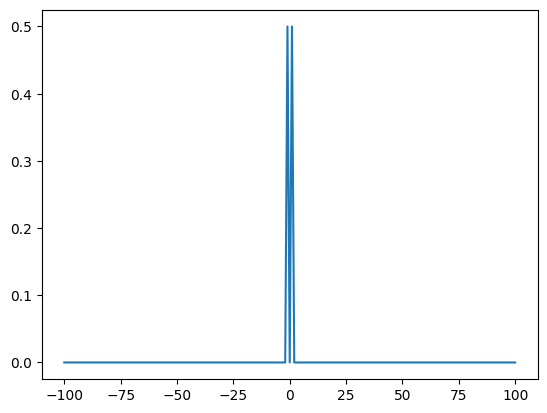

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb34b86d3d0>

In [20]:
plot(-N:N,p)

Comparison
--

In [3]:
N=7
N1 = 8
p=OffsetArray(zeros(2N1+1), -N1:N1);
p[-N+1:N-1] .= 1/(2N-1)
q1 = copy(p)
q2 = copy(p)

for i=1:10
    q1 = iter_slow(q1,3)
    q2 = iter(q2,3)
end
[q1[-N:N] q2[-N:N]]

15×2 Array{Float64,2}:
 1.82615e-52  0.0
 3.33866e-27  3.29725e-27
 6.99126e-14  6.97676e-14
 3.49772e-7   3.49745e-7
 0.000847722  0.000847632
 0.0399563    0.0399577
 0.245227     0.24522
 0.427938     0.427948
 0.245227     0.24522
 0.0399563    0.0399577
 0.000847722  0.000847632
 3.49772e-7   3.49745e-7
 6.99126e-14  6.97676e-14
 3.33866e-27  3.29725e-27
 1.82615e-52  0.0

In [51]:
function findsolution(k; tol=1e-15, maxiter=10^7, eq=iter, N=6)
    err = Inf
    p=OffsetArray(zeros(2N+3), -N-1:N+1);
    p[-N+1:N-1] .= 1/(2N+1)
    p ./= sum(p);
    for i = 1:maxiter
        (err <= tol) && break
        q = eq(p,k)
        err = maximum(abs.(q-p))
        p = 0.1q + 0.9p
    end
    @show k, err
    p
end

findsolution (generic function with 1 method)

Free Energy
--

\begin{align*}
-F_{a} & =\frac{1}{\beta}\log\sum_{\sigma:sat}\prod_{i\in\partial a}\frac{e^{\beta\left(f_{bi}+s_{i}\right)\sigma_{i}}}{2\cosh\left(\beta f_{bi}\right)}\\
 & =\frac{1}{\beta}\log\sum_{\sigma:sat}e^{\beta\sum_{i\in\partial a}\left(f_{bi}+s_{i}\right)\sigma_{i}}-\frac{1}{\beta}\sum_{i\in\partial a}\log2\cosh\left(\beta f_{bi}\right)\\
 & \to\max_{\sigma:sat}\sum_{i\in\partial a}\left(f_{bi}+s_{i}\right)\sigma_{i}-\sum_{i\in\partial a}\left|f_{bi}\right|\\
 & =\sum_{i\in\partial a}\left\{ \left|f_{bi}+s_{i}\right|-\left|f_{bi}\right|\right\} -\Theta\left(-\prod_{i\in\partial a}\left(f_{bi}+s_{i}\right)\right)2\min_{i\in\partial a}\left|f_{bi}+s_{i}\right|\\
 & =\sum_{i\in\partial a}\left\{ \left|f_{bi}+s_{i}\right|-\left|f_{bi}\right|\right\} -\Theta\left(-\prod_{i\in\partial a}\left(f_{bi}+s_{i}\right)\right)2\min_{i\in\partial a}\left|f_{bi}+s_{i}\right|\\
-F_{i} & =\frac{1}{\beta}\log\sum_{\sigma_{i}}\frac{e^{\beta\sigma_{i}\left(f_{ai}+f_{bi}+s_{i}\right)}}{2\cosh\left(\beta f_{ai}\right)2\cosh\left(\beta f_{bi}\right)}\\
 & =\frac{1}{\beta}\log\sum_{\sigma_{i}}e^{\beta\sigma_{i}\left(f_{ai}+f_{bi}+s_{i}\right)}-\frac{1}{\beta}\log2\cosh\left(\beta f_{ai}\right)-\frac{1}{\beta}\log2\cosh\left(\beta f_{bi}\right)\\
 & \to\left|f_{ai}+f_{bi}+s_{i}\right|-\left|f_{ai}\right|-\left|f_{bi}\right|\\
F &= \sum_{a}F_{a}-\sum_{i}F_{i}
\end{align*}

So we get the overlap:

$$O=-F= -\sum_{a}F_{a}+\sum_{i}F_{i}$$


In [5]:
function overlap_slow(p,K)
    N = lastindex(p)
    O = 0.0
    S = CartesianIndices(Tuple(fill(0:1,K)))
    for ff in map(Tuple, CartesianIndices(Tuple(fill(-N:N,K))))
        P = prod(p[fi] for fi in ff) / 2^K
        for fs in map(s -> ff .+ (2 .* Tuple(s) .- 1), S)
            O += P*sum(abs.(fs))
            if prod(fs) < 0
                O -= P*2*minimum(abs.(fs))
            end
        end
    end
    O *= 2/K
    for f1=-N:N
        for f2=-N:N
            for s = (-1,1)
                O -= p[f1]*p[f2]*0.5*(abs(f1+f2+s))
            end
        end
    end
    O
end

overlap_slow (generic function with 1 method)

Simplifications for the overlap
--

* On a single instance (by rearranging the sums)

\begin{align*}
O&=-\frac{1}{n}\sum_{a=1}^m\Theta\left(-\prod_{i\in\partial a}\left(f_{bi}+s_{i}\right)\right)2\min_{i\in\partial a}\left|f_{bi}+s_{i}\right|+\frac{1}{n}\sum_{i=1}^n\left(|f_{bi}+s_i|+|f_{ai}+s_i|-|f_{ai}+f_{bi}+s_i|\right)
\end{align*}
that one can re-write
\begin{align*}
O&=\frac{1}{n}\sum_{i=1}^nF(f_{ai},f_{bi},s_i)+\frac{1}{n}\sum_{a=1}^m G(\{f_{bi}\}_{i\in\partial a};|\partial a|)
\end{align*}

* Averaging over the graph and source (for an arbitrary factor degree profile $P(X)$)
\begin{align*}
O^{RS} &= \sum_s\frac{1}{2}\sum_{f_1,f_2}\left(|f_1+s|+|f_2+s|-|f_1+f_2+s|\right)p(f_1)p(f_2) \\
&- \frac{2}{P'(1)}\sum_{k=0}^{\infty}P_k\sum_{f_1,\dots,f_k}\sum_{s_1,\dots,s_k}\frac{1}{2^k}\Theta\left(-\prod_{i=1}^k\left(f_i+s_i\right)\right)2\min_{i=1,\dots,k}\left|f_i+s_i\right|\prod_{i=1}^k p(f_i)\\
\end{align*}
The factor $2/P'(1)$ is the number of factors per variables $\alpha=m/n=2/P'(1)$ : in the RS approximation, each term $G(\{f_{bi}, s_i\}, |\partial a|)$ in the sum $(1/n)\sum_{a=1}^m G(\{f_{bi}, s_i\}, |\partial a|)$ over the factors has the same contribution, and there is $m$ terms in the sum, therefore we obtain the contribution $\alpha\mathbb{E}[G(\{f_i,s_i\}_{i=1,\dots,k}; k)]$. The average is taken over the random variables, $k$ is drawn from $P_k$; $f_1,\dots f_k$ are drawn from $p(f)$ i.i.d., and $s_1,\dots,s_k$ are $\pm 1$ uniformly and i.i.d.

* The second term can be simplified:
\begin{align*}
&\sum_{f_1,\dots,f_k}\sum_{s_1,\dots,s_k}\frac{1}{2^k}\Theta\left(-\prod_{i=1}^k\left(f_i+s_i\right)\right)2\min_{i=1,\dots,k}\left|f_i+s_i\right|\prod_{i=1}^k p(f_i)\\
=& \sum_{f_1,\dots,f_k} \Theta\left(-\prod_{i=1}^k f_i\right)2\min_{i=1,\dots,k}|f_i|\prod_{i=1}^k\left(\sum_{s_i}\frac{1}{2}p(f_i-s_i)\right)\\
=& \sum_{f_1,\dots,f_k>0}\min_{i=1,\dots,k}(f_i)\prod_{i=1}^k\left(\sum_{s_i}p(f_i-s_i)\right)\\
=& \sum_{f>0}f\sum_{n=1}^k{k\choose n}\left(\sum_s p(f-s)\right)^n\left(\sum_{f'>f}\sum_s p(f'-s)\right)^{k-n} \\
=& \sum_{f>0}f\left\{ \left(\sum_{f'\geq f}\sum_s p(f'-s)\right)^k - \left(\sum_{f'>f}\sum_s p(f'-s)\right)^k\right\}
\end{align*}

RS equations for an arbitrary factor degree profile $P(X)$
--

\begin{align*}
p\left(f\right)=\sum_{k=0}^{\infty}\tilde{P_k}\frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)
\end{align*}
with the residual degree profile 
\begin{align*}
\tilde{P_k}=\frac{(k+1)P_{k+1}}{P'(1)}
\end{align*}
which is the the probability distribution, for a factor node reached by following an edge, of the number of other edges attached to that node.
Using the simplifications below:
\begin{align*}
p\left(f\right)=\sum_{k=0}^{\infty}\tilde{P_k}\begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\left(\frac{1}{2}\sum_{s\in\pm1}p\left(s\right)+\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k} & \text{ for }f=0
\end{cases}
\end{align*}

In [128]:
using OffsetArrays

function overlap_variables(p)# first term in the expression of the overlap (sum over variables)
    O = 0.0
    N = lastindex(p)-1
    for f1=-N:N
        for f2=-N:N
            for s = (-1,1)
                O += p[f1]*p[f2]*0.5*(abs(f1+s)+abs(f2+s)-abs(f1+f2+s))
            end
        end
    end
    O
end
function overlap_factors(p,k) #second term, at fixed k
    O = 0.0
    N = lastindex(p)-1
    for f = 1:N-1
        v1 = p[f+1]+p[f-1]
        v2 = sum(p[f1+1]+p[f1-1] for f1=f+1:N)
        v = (v1+v2)^k-v2^k
        O += f*v
    end
    O
end

function overlap_fixeddeg(p,k)
    O=overlap_variables(p)-(2/k)*overlap_factors(p,k)
    O
end

overlap_fixeddeg (generic function with 1 method)

In [7]:
p=findsolution(3)
[overlap_slow(p,3) overlap_fixeddeg(p,3)]

(k, err) = (3, 9.43689570931383e-16)


1×2 Array{Float64,2}:
 0.580759  0.580759

In [8]:
distortion(K; kwdargs...) = (1-overlap_fixeddeg(findsolution(K; kwdargs...), K))/2

distortion (generic function with 1 method)

In [9]:
Ks = 3:10
D = distortion.(Ks)
R = 1 .- 2 ./ Ks

[R D]

(k, err) = (3, 9.43689570931383e-16)
(k, err) = (4, 9.992007221626409e-16)
(k, err) = (5, 8.881784197001252e-16)
(k, err) = (6, 9.992007221626409e-16)
(k, err) = (7, 9.992007221626409e-16)
(k, err) = (8, 8.881784197001252e-16)
(k, err) = (9, 9.992007221626409e-16)
(k, err) = (10, 9.992007221626409e-16)


8×2 Array{Float64,2}:
 0.333333  0.209621
 0.5       0.141487
 0.6       0.105593
 0.666667  0.0830604
 0.714286  0.0676468
 0.75      0.0565155
 0.777778  0.0481531
 0.8       0.0416759

In [10]:
R = 1 .- 2 ./ Ks

8-element Array{Float64,1}:
 0.33333333333333337
 0.5
 0.6
 0.6666666666666667
 0.7142857142857143
 0.75
 0.7777777777777778
 0.8

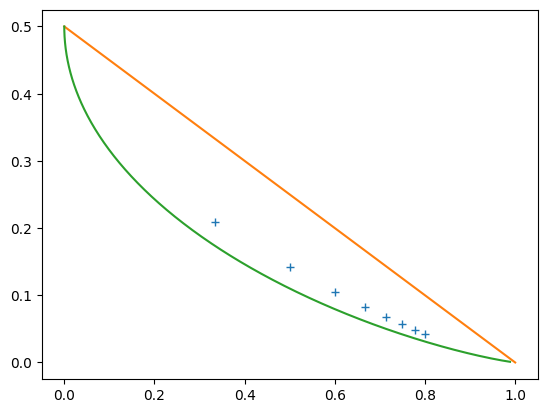

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7facca198860>

In [11]:
using PyPlot
H(p)=1+p*log2(p)+(1-p)*log2(1-p)

#xlim(0,1)
#ylim(0,0.5)
plot(R,D, "+")
plot((0,1),(0.5,0))
plot(H.(0:0.001:0.5), 0:0.001:0.5)

In [98]:
function mixed(pk; maxiter=10^7, tol=1e-15, N=6, damp=0.9)
    N1 = N + 1
    p=OffsetArray(zeros(2N1+1), -N1:N1);
    p[-N+1:N-1] .= 1/(2N-1)
    krange = [k for k in eachindex(pk) if pk[k] > tol]
    @assert sum(pk[krange]) ≈ 1
    z = sum(k*pk[k] for k=krange)
    for i=1:maxiter
        p1 = sum(k*pk[k]*iter(p,k) for k=krange)/z
        if sum(abs.(p1 - p)) < tol
            break
        end
        p = p*damp+p1*(1-damp)
    end
    O = overlap_variables(p) - (2/z)*sum(pk[k]*overlap_factors(p,k) for k=krange)
    D = (1-O)/2
end

mixed (generic function with 1 method)

In [213]:
function mixture2(R) 
    α=1-R
    k=floor(Int, 2/α)
    s=k+1-2/α
    p=[fill(0,k-1); s; 1-s]
    p .*= p .> 1e-10
    p ./ sum(p)
end


mixture2 (generic function with 1 method)

In [214]:
Rm = 0.01:0.01:0.99
pks = mixture2.(Rm)
αs = 2 ./ [sum(k*pk[k] for k=eachindex(pk)) for pk in pks]
@assert Rm ≈ 1 .- αs
Dm = mixed.(pks, N=30)

99-element Vector{Float64}:
 0.4546474073128681
 0.43565049932361133
 0.42092765046912317
 0.40839439222208573
 0.3972457420215144
 0.3870702443196218
 0.3776242651788484
 0.36874955806591975
 0.3603365352601175
 0.3523056385673838
 0.34459697668198624
 0.33716414626734653
 0.3299703418625086
 ⋮
 0.020370784947590925
 0.017979055383501308
 0.015666129177374533
 0.013449978144655372
 0.0113201258591068
 0.009302254807509736
 0.007397829094439923
 0.0056264302423451595
 0.004010648891537405
 0.002577264143732827
 0.0013672330158682189
 0.0004509986577261871

In [227]:
include("../code/headers.jl")

In [228]:
seed = 1234
n = factorial(7)*2
R = 0.21:0.05:0.81
m_ = n*(1 .- R)
nrates = length(m_)
m = round.(Int,m_)
ms = MS(maxiter=1000, convergence=:parity, Tmax=1, gamma=5e-3, sigma=1e-10)
oc = OptimalCycle()
res_MS = Vector{BPResults{MS}}(undef,nrates)
res_OC = Vector{OptimalCycleResults}(undef,nrates)
avg_dist = zeros(nrates)
avg_dist_oc = zeros(nrates)
navg = 10;

In [229]:
for j in eachindex(m)
    println("## Rate $(round(R[j],digits=2)). $j of $(length(m))")
    for i in 1:navg
        lm = LossyModel(Val(2), n, m[j], randseed=seed+i)
        res_OC[j] = solve!(deepcopy(lm), oc)
        avg_dist_oc[j] += res_OC[j].distortion
        res_MS[j] = solve!(lm, ms, randseed=seed, verbose=true, showprogress=false)
        avg_dist[j] += res_MS[j].distortion 
    end
    avg_dist[j] /= navg
    avg_dist_oc[j] /= navg
end

## Rate 0.21. 1 of 13
Iter 1. Distortion 0.2819. Cycle weight -4364.0. Energy shift -2182.0
Iter 2. Distortion 0.2819. Cycle weight 0.0. Energy shift 0.0
Iter 1. Distortion 0.279. Cycle weight -4520.0. Energy shift -2260.0
Iter 2. Distortion 0.279. Cycle weight 0.0. Energy shift 0.0
Iter 1. Distortion 0.2791. Cycle weight -4522.0. Energy shift -2261.0
Iter 2. Distortion 0.2791. Cycle weight 0.0. Energy shift 0.0
Iter 1. Distortion 0.2786. Cycle weight -4428.0. Energy shift -2214.0
Iter 2. Distortion 0.2786. Cycle weight 0.0. Energy shift 0.0
Iter 1. Distortion 0.2755. Cycle weight -4394.0. Energy shift -2197.0
Iter 2. Distortion 0.2755. Cycle weight 0.0. Energy shift 0.0
Iter 1. Distortion 0.279. Cycle weight -4284.0. Energy shift -2142.0
Iter 2. Distortion 0.279. Cycle weight 0.0. Energy shift 0.0
Iter 1. Distortion 0.2795. Cycle weight -4398.0. Energy shift -2199.0
Iter 2. Distortion 0.2795. Cycle weight 0.0. Energy shift 0.0
Iter 1. Distortion 0.2776. Cycle weight -4598.0. Energy sh

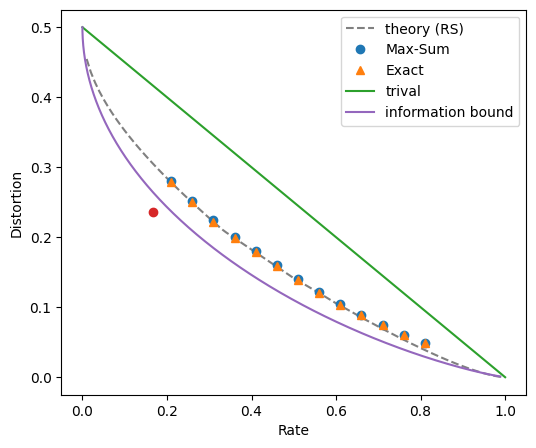

Max-Sum distortion are averages over 10 instances


In [231]:
using PyPlot
H(p)=1+p*log2(p)+(1-p)*log2(1-p)
println("Max-Sum distortion are averages over ", navg, " instances")

#xlim(0,1)
#ylim(0,0.5)
#plot(R,D, "x", label="RS RRG")
fig, ax = subplots(figsize=(6,5))
xlabel("Rate")
ylabel("Distortion")
PyPlot.plot(Rm,Dm, "--", label="theory (RS)", c=:gray)
PyPlot.plot(R, avg_dist, "o", label="Max-Sum", ms=6)
PyPlot.plot(R, avg_dist_oc, "^", label="Exact", ms=6)
PyPlot.plot((0,1),(0.5,0), label="trival")
PyPlot.plot(0.16666666666666663, 0.23569972549730178, "o") 
PyPlot.plot(H.(0:0.001:0.5), 0:0.001:0.5, label="information bound")
legend()
PyPlot.savefig("rs_vs_ms.png")

When variables have arbitrary degree profile $\Lambda(X)$
---
* Max-Sum equations becomes
\begin{align}
    f_{ai} &= \min_{j\in\partial a\setminus i}\left|s_j + \sum_{b\in\partial j\setminus a}f_{bj} \right|\prod_{j\in\partial a\setminus i}{\rm sign}\left(s_j + \sum_{b\in\partial j\setminus a}f_{bj}\right) \end{align}
* the Bethe free energy becomes
\begin{equation}
    F = \sum_{a=1}^m F_a - (|\partial i|-1)\sum_{i=1}^n F_i 
\end{equation}
with
\begin{align*}
    F_a &=-\frac{1}{\beta}\log\left(\sum_{\sigma:sat}\prod_{i\in\partial a}\frac{e^{\beta\sigma_i\left(s_i+\sum_{b\in\partial i\setminus a}f_{bi}\right)}}{\prod_{b\in\partial i\setminus a}2{\rm cosh}(\beta f_{bi})}\right)\\
    &= -\frac{1}{\beta}\log\left(\sum_{\sigma:sat}\prod_{i\in\partial a}e^{\beta\sigma_i\left(s_i+\sum_{b\in\partial i\setminus a}f_{bi}\right)}\right)+\frac{1}{\beta}\sum_{i\in\partial a}\sum_{b\in\partial i\setminus a}\log(2{\rm cosh}(\beta f_{bi}))\\
    &\to-\sum_{i\in\partial a}\left(\left|s_i + \sum_{b\in\partial i\setminus a}f_{bi}\right|-\sum_{b\in\partial i\setminus a}|f_{bi}|\right) + \Theta\left(-\prod_{i\in\partial a}\left(s_i + \sum_{b\in\partial i\setminus a}f_{bi}\right)\right)2\min_{i\in\partial a}\left|s_i + \sum_{b\in\partial i\setminus a}f_{bi}\right|
\end{align*}
and 
\begin{align*}
    F_i &= -\frac{1}{\beta}\log\left(\sum_{\sigma_i}\frac{e^{\beta\sigma_i\left(s_i + \sum_{a\in\partial i}f_{ai}\right)}}{\prod_{a\in\partial i}2{\rm cosh}(\beta f_{ai})}\right)\\
    &= -\frac{1}{\beta}\log\left(\sum_{\sigma_i}e^{\beta\sigma_i\left(s_i + \sum_{a\in\partial i}f_{ai}\right)}\right) + \frac{1}{\beta}\sum_{a\in\partial i}\log(2{\rm cosh}(\beta f_{ai}))\\
    &\to- \left|s_i + \sum_{a\in\partial i}f_{ai}\right|+\sum_{a\in\partial i}|f_{ai}|
\end{align*}

\begin{align*}
F_{factors}&= \sum_a \Theta\left(-\prod_{i\in\partial a}\left(s_i + \sum_{b\in\partial i\setminus a}f_{bi}\right)\right)2\min_{i\in\partial a}\left|s_i + \sum_{b\in\partial i\setminus a}f_{bi}\right|\\
F_{vars}& = -\sum_i \sum_{a\in\partial i}\left(\left|s_i + \sum_{b\in\partial i\setminus a}f_{bi}\right|\right) + \sum_i (d_i - 1) \left|s_i + \sum_{a\in\partial i}f_{ai}\right|
\end{align*}

\begin{align*}
O_{vars} &=  \sum_d \Lambda_d \left\{d \sum_f |f| q_{d-1}(f) + (d-1) \sum_f |f|q_d(f)\right\}
\end{align*}

RS cavity method
---
* The RS equations become
\begin{align}
    p(f) &= \sum_{k=0}^{\infty}\tilde{P_k}\sum_{d_1,\dots,d_k}\prod_{i=1}^k\tilde{\Lambda}_{d_i}\sum_{\{f_{ij}\}^{i=1\dots k}_{j=1,\dots d_i}}\sum_{s_1,\dots,s_k}\frac{1}{2^k}\delta(f-F^{MS}(\{f_{ij}\}))\prod_{i,j}p(f_{ij})
\end{align}

This is equivalent to:

\begin{align}
q(g) &= \sum_{d=0}^\infty \tilde\Lambda_{d} \frac12\sum_{s\in\pm1} \sum_{f_1,\dots,f_d}\delta\left(g -s -\sum_{a=1}^d f_a\right)\prod_{a=1}^d p(f_a) \\
&= \sum_{d=0}^\infty \tilde\Lambda_{d}  q_d(f)\\
p(f) &= \sum_{k=0}^{\infty}\tilde{P_k}\sum_{g_1,\dots,g_k}\delta\left(f-\min_{j=1,\dots,k-1}\left|g_{j} \right|{\rm sign} \left(\prod_{j=1,\dots,k-1}g_{j}\right)\right)\prod_{j}q(g_{j})
\end{align}

note that the second line is almost the old equation (even without the $s$). Note also that $q_d(f)$ is a simple convolution power that can be computed iteratively, with

\begin{align}
q_0(f) &= \frac12(\delta(f-1)+\delta(f+1))\\
q_{d+1}(f) &= \sum_{f',f''} \delta\left(f-f'-f''\right) q_d(f')p(f'')
\end{align}


In [226]:
#here d is a vector of length K-1 with the degrees of the input vars
function convolve(p1, p2)
    N2 = lastindex(p2)
    q = OffsetArray(zeros(2N2+1),-N2:N2)
    for f1 in eachindex(p1)
        for f2 in eachindex(p2)
            q[clamp(f1+f2, firstindex(q), lastindex(q))] += p1[f1]*p2[f2]
        end
    end
    q
end

function iterg(p, Λ)
    qd = OffsetArray([0.5,0,0.5],-1:1)
    N = lastindex(p)
    q = OffsetArray(zeros(2N+1), -N:N)
    for d ∈ eachindex(Λ)
        qd = convolve(qd, p)
        for i in eachindex(qd)
            q[clamp(i, -N, N)] += Λ[d] * qd[i]
        end
    end
    q
end

function iterf(p, K)
    k = K - 1
    p1 = zero(p)
    N = lastindex(p1)-1
    for f = 1:N-1
        v1 = p[f]
        v2 = sum(p[f+1:N])
        v = (v1+v2)^k-v2^k
        p1[+f] = v/2
        p1[-f] = v/2
    end
    v1 = p[0]/2
    v2 = sum(p[f1] for f1=1:N)
    p1[0] = (v1+v2)^k-v2^k
    p1 ./ sum(p1)
end

function RS(Pk, Λ; N=100, tol=1e-3, maxiter=100, damp=0.9)
    krange = [k for k in eachindex(Pk) if Pk[k] > tol]
    @assert sum(Pk[krange]) ≈ 1
    z = sum(k*Pk[k] for k=krange)
    p = OffsetArray(ones(2N+1), -N:N)
    p ./= sum(p)
    tildeΛ = Λ[2:end].*(2:lastindex(Λ))
    tildeΛ ./= sum(tildeΛ)
    for iter=1:maxiter
        q = iterg(p, tildeΛ)
        q ./= sum(q)
        p1 = sum(k*Pk[k]*iterf(q,k) for k=krange)
        p1 ./= sum(p1)
        err = sum(abs.(p1 - p)) 
        err < tol && (@show err iter; break)
        p = p*damp+p1*(1-damp)
    end
    q1 = iterg(p, Λ[2:end].*(2:lastindex(Λ)))
    q2 = iterg(p, Λ.*(0:lastindex(Λ)-1))
    α = (Λ'eachindex(Λ)) / (Pk'eachindex(Pk))
    ### check!!
    O = sum(abs(f)*q1[f] for f in eachindex(q1))
    O -= sum(abs(f)*q2[f] for f in eachindex(q2))
    O -= α*sum(Pk[k]*overlap_factors(p,k) for k=krange)
    1-α,(1-O)/2    
end

RS (generic function with 2 methods)

In [225]:
d = RS([0,0,1], [0.0, 0.5, 0.5]; N=100, tol=1e-10, maxiter=10000)

err = 9.565559537740846e-11
iter = 518


LoadError: UndefVarError: ⋅ not defined

* The RS approximation of the minimal energy becomes 
\begin{align}
    O^{RS} =& \sum_{k}P_k\sum_{d_1,\dots,d_k}\prod_{i=1}^k\tilde{\Lambda}_{d_i}\sum_{\{f_{i,j}\}^{i=1,\dots k}_{j=1,\dots d_j}}\prod_{ij}p(f_{ij})\sum_{s_1,\dots,s_k}\frac{1}{2^k} F_a(\{f_{ij}\},\{s_i\})\\
    -&\sum_{d}\Lambda_d(d-1)\sum_{f_1,\dots,f_d}\prod_{i=1}^dp(f_i)\sum_s\frac{1}{2}F_i(f_1,\dots,f_d,s)
\end{align}

1RSB equations for Max-Sum (Survey Propagation) at finite parameter $y$
---
We consider the auxiliary statistical physics model
\begin{align}
    P_y(\{u_{ai},u_{ia}\})=\frac{1}{Z(y)}\mathbb{I}\left(\{u_{ai},u_{ia}\}\text{sat Max-Sum}\right)e^{-yF(\{u_{ai},u_{ia}\})}
\end{align}
in which the variables are the Max-Sum messages living on the edges, and the constraints (that can be put in a factorized form) enforces the Max-Sum equations to be satisfied. Each Max-Sum solution represents a cluster. The Max-Sum solutions are weighted according to their Bethe free energy, which corresponds to the minimal energy (inside the cluster). In the $y\to\infty$ limit one keeps only the clusters with minimal energy

* The distributions $Q_{ia}(u_{ia})$, $Q_{ai}(u_{ai})$ over Max-Sum messages obey the 1RSB equations :
\begin{align}
    Q_{ia}(u_{ia})&=\frac{1}{Z_{ia}}\sum_{\{u_{bi}\}_{b\in\partial i\setminus a}}\delta(u_{ia}-f^{MS}_{ia}(\{u_{bi}\}_{b\in\partial i\setminus a}))e^{-yC_{ia}}\prod_{b\in\partial i\setminus a}Q_{bi}(u_{bi}) \\
    Q_{ai}(u_{ai})&=\frac{1}{Z_{ai}}\sum_{\{u_{ja}\}_{j\in\partial a\setminus i}}\delta(u_{ai}-f^{MS}_{ai}(\{u_{ja}\}_{j\in\partial a\setminus i}))e^{-yC_{ai}}\prod_{j\in\partial a\setminus i}Q_{ja}(u_{ja})    
\end{align}
where $u_{ia}-f^{MS}_{ia}(\{u_{bi}\}_{b\in\partial i\setminus a})$, and $u_{ai}-f^{MS}_{ai}(\{u_{ja}\}_{j\in\partial a\setminus i})$ are shorthand notation for the Max-Sum equations
\begin{align}
    u_{ia}(\sigma_i)&=s_i\sigma_i+ \sum_{b\in\partial i\setminus a}u_{bi}(\sigma_i) - C_{ia}\\
    u_{ai}(\sigma_i)&=\max_{\{\sigma_j\}_{j\in\partial a\setminus i}:{\rm sat}}\left(\sum_{j\in\partial a\setminus i}u_{ja}(\sigma_j)\right) - C_{ai}
\end{align}
and $C_{ia}$, $C_{ai}$ are the constants in the Max-Sum equations
\begin{align}
    C_{ia}&=\max_{\sigma_i}\left(s_i\sigma_i+ \sum_{b\in\partial i\setminus a}u_{bi}(\sigma_i)\right)\\
    C_{ai}&=\max_{\{\sigma_i\}_{i\in\partial a}:{\rm sat}}\left(\sum_{j\in\partial a\setminus i}u_{ja}(\sigma_j)\right)
\end{align}
the constants $Z_{ia}$, $Z_{ai}$ are normalizations of the distributions $Q_{ia}$, $Q_{ai}$ over the Max-Sum messages

* With the parametrization $u_{ai} = f_{ai}\sigma_i+g_{ai}$ we get:
\begin{equation}
    g_{ai} = -\frac{1}{\beta}\log(2{\rm cosh}(\beta f_{ai})\to-|f_{ai}|
\end{equation}
Therefore :
\begin{align*}
    C_{ia}&=\max_{\sigma_i}\left(\sigma_i\left(s_i+ \sum_{b\in\partial i\setminus a}f_{bi}\right)\right) + \sum_{b\in\partial i\setminus a}g_{bi}\\
    &=\left|s_i+ \sum_{b\in\partial i\setminus a}f_{bi}\right| - \sum_{b\in\partial i\setminus a}|f_{bi}|
\end{align*}
and
\begin{align*}
    C_{ai}&=\max_{\{\sigma_i\}_{i\in\partial a}:{\rm sat}}\left(\sum_{j\in\partial a\setminus i}f_{ja}\sigma_j\right)-\sum_{j\in\partial a\setminus i}|f_{ja}|\\
    &= -2\min_{j\in\partial a\setminus i}|f_{ja}|\Theta\left(-\prod_{j\in\partial a\setminus j}f_{ja}\right)
\end{align*}

* We can then write the same 1RSB equations for the distributions $P_{ia}(f_{ia})$, $P_{ai}(f_{ai})$ over the integer parameters $f_{ia}$, $f_{ai}$. We can also write a closed equation on the distribution $P_{ai}$, using that :
\begin{equation}
    P_{ai}(f_{ia})=\frac{1}{Z_{ia}}\sum_{\{f_{bj}\}_{j\in\partial a \setminus i, b\in\partial j\setminus a}}\delta(f_{ia}-F^{MS}(\{f_{bj}\})e^{-y\left(C_{ai}+\sum_{j\in\partial a\setminus i}C_{ja}\right)}\prod_{j\in\partial a \setminus i, b\in\partial j\setminus a}P_{bj}(f_{bj})
\end{equation}
with:
\begin{align*}
    C_{ai}+\sum_{j\in\partial a\setminus i}C_{ja} &= \max_{\sigma:sat}\left(\sum_{j\in\partial a \setminus i}\sigma_j\left(s_j + \sum_{b\in\partial j\setminus a}f_{bj}\right)\right)-\sum_{j\in\partial a\setminus i}\sum_{b\in\partial j\setminus a}|f_{bj}|
\end{align*}

* Random graph ensemble
When the source and the factor graph are random variables the 1RSB messages $P_{ai}$, $(a,i)\in E$ become random variables. Let $(a,i)$ be a uniformly chosen edge in a factor graph drawn from the random ensembl, and let $\mathcal{P}$ be the distribution of the message $P_{ai}$ solution of the 1RSB equation written above. The distribution $\mathcal{P}(p)$ obey consistency equation similar to the RS cavity equations:
\begin{align}
    \mathcal{P}(P)=\sum_{k}\tilde{P}_k\sum_{d_1,\dots, d_k}\left(\prod_{i=1}^k\tilde{\Lambda}_{d_i}\right)\int\prod_{i=1}^k\prod_{j=1}^{d_i}{\rm d}\mathcal{P}(P_{ij})\delta(P-F^{1RSB}(\{P_{i,j}\}))
\end{align}
This equation always admits a trivial fixed point $\mathcal{P}(P)=\delta[P-p^{RS}]$, where $p^{RS}$ is the solution of the RS cavity equation.
In the RS phase, this trivial fixed-point is the unique solution, while in the 1RSB phase, the trivial solution becomes unstable and the above equation admits a non-trivial solution.

In [1]:
n

LoadError: UndefVarError: n not defined